In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_excel(r'C:\Users\didit\OneDrive\Desktop\Studio 6\Dataset\Telco_customer_churn_label_Cleaned.xlsx')

# Target and features
target = 'Churn Value'
X = df.drop(columns=[target])
y = df[target]

# Encode categorical features if necessary
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# LightGBM classifier
clf = lgb.LGBMClassifier(random_state=42)

# Grid of hyperparameters
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2514
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [2]:
print("Target in features:", 'Churn Value' in X.columns)

Target in features: False


In [3]:
correlations = df.corr(numeric_only=True)['Churn Value'].sort_values(ascending=False)
print(correlations)

Churn Value          1.000000
Churn Score          0.664897
Monthly Charges      0.193356
Paperless Billing    0.191825
Senior Citizen       0.150889
Streaming TV         0.063228
Streaming Movies     0.061382
Multiple Lines       0.038037
Phone Service        0.011942
Longitude            0.004594
Zip Code             0.003346
Latitude            -0.003384
Gender_encoded      -0.008612
Gender              -0.008612
Device Protection   -0.066160
Online Backup       -0.082255
CLTV                -0.127463
Partner             -0.150448
Tech Support        -0.164674
Online Security     -0.171226
Total Charges       -0.198324
Dependents          -0.248542
Tenure Months       -0.352229
Count                     NaN
Name: Churn Value, dtype: float64


In [4]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
# df = pd.read_excel('/mnt/data/Telco_customer_churn_label_Cleaned.xlsx')

# Drop potential leakage columns
df = df.drop(columns=['Churn Score'], errors='ignore')

# Target variable
target = 'Churn Value'
y = df[target]

# Select only the desired features
selected_features = [
    'Tenure Months', 'Monthly Charges', 'Paperless Billing',
    'Contract', 'Dependents', 'Online Security', 'Tech Support'
]
X = df[selected_features].copy()

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Initialize LightGBM classifier
clf = lgb.LGBMClassifier(random_state=42)

# Hyperparameter tuning grid
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation metrics
print("\nBest Parameters:")
print(grid_search.best_params_)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance plot
# importances = best_model.feature_importances_
# feature_df = pd.DataFrame({
    # 'Feature': X.columns,
    # 'Importance': importances


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 339
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328

Best Parameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.8}

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.64      0.5

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 339
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Best Parameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 50, 'subsample': 0.8}

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.68      0.60       374

    accuracy                    

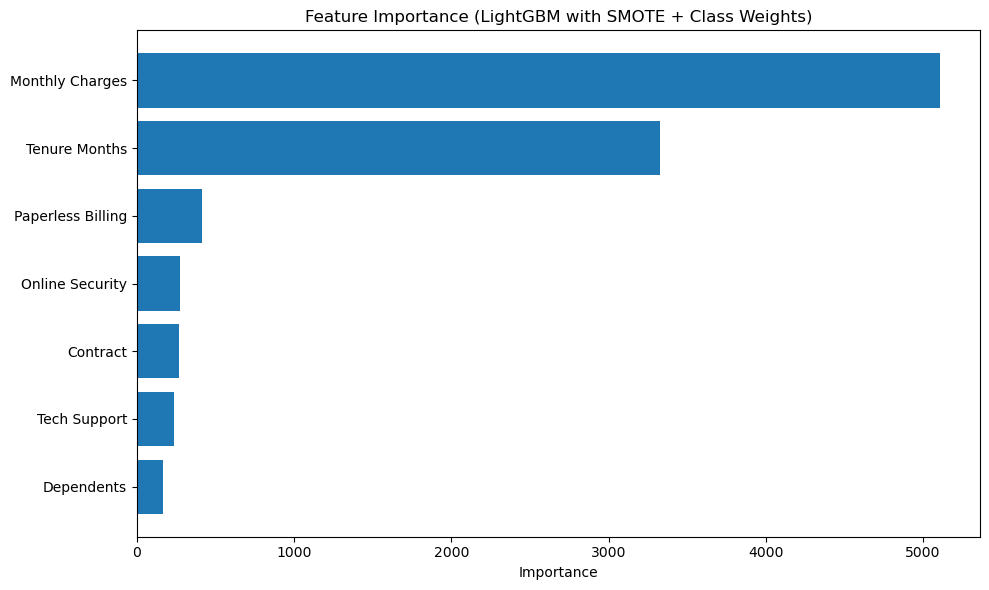

In [5]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load dataset
# df = pd.read_excel('/mnt/data/Telco_customer_churn_label_Cleaned.xlsx')

# Drop potential leakage columns
df = df.drop(columns=['Churn Score'], errors='ignore')

# Target and selected features
target = 'Churn Value'
selected_features = [
    'Tenure Months', 'Monthly Charges', 'Paperless Billing',
    'Contract', 'Dependents', 'Online Security', 'Tech Support'
]

X = df[selected_features].copy()
y = df[target]

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# LightGBM with class_weight
clf = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Grid search parameters
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV optimizing for recall
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='recall', verbose=1, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
print("\nBest Parameters:")
print(grid_search.best_params_)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
importances = best_model.feature_importances_
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance (LightGBM with SMOTE + Class Weights)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# NOTE: This model is better at catching churners - 68% accurate, although accuracy slightly drops which is common when using SMOTE. 
# The model is more sensitive to churn, which is usually better for churn prevention — it's safer to flag more potential churners than miss them.
# 

Confusion Matrix:
 [[775 260]
 [ 86 288]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

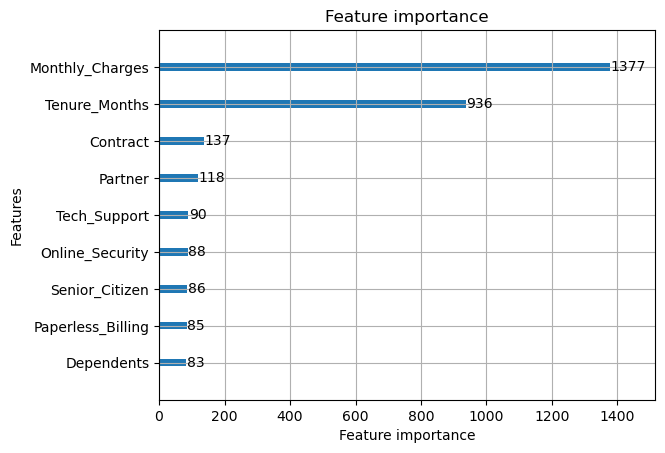

In [6]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset
# df = pd.read_excel("Telco_customer_churn_label_Cleaned.xlsx")

# Selected features based on correlation + no multicollinearity
selected_features = [
    'Contract', 'Tenure Months', 'Monthly Charges',
    'Dependents', 'Partner', 'Senior Citizen',
    'Online Security', 'Tech Support', 'Paperless Billing'
]
target = 'Churn Value'

# Prepare features and convert necessary columns to category
X = df[selected_features].copy()
y = df[target]

categorical_cols = ['Contract','Dependents', 'Partner', 'Senior Citizen', 'Online Security', 'Tech Support', 'Paperless Billing']
X[categorical_cols] = X[categorical_cols].astype('category')

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Handle class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Prepare LightGBM datasets
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

# LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42,
    'scale_pos_weight': scale_pos_weight
}

# Train the model
model = lgb.train(params, lgb_train, num_boost_round=100)

# Predict
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))
lgb.plot_importance(model)


# Feature importance
# Longer bar = more important feature
# Features with very low importance can often be removed with minimal model performance loss


# NOTE: This model is the best of the 3 here, since the objective is to catch as many churners as possible (even if we get some false alarms).
# A trade-off is made: more customers are flagged as churners, but you are able to save more actual ones. 
# Recall (detecting churners) - this model catches more 77% vs 68%
# F1-score (Balance of precision/recall) - this model at 62% is higher means better overall performance. 
# Precision and Accuracy - Tie, marginal difference. 
# False negatives - this model is better, fewer churners missed (86 vs 119)




In [7]:
import pandas as pd

# --- Create results DataFrame with reset indexes to prevent misalignment ---
results_df = X_test.reset_index(drop=True).copy()
results_df['Actual Churn'] = y_test.reset_index(drop=True)
results_df['Churn Probability'] = y_pred
results_df['Predicted Churn'] = y_pred_binary

# --- Add churn risk tiers ---
def risk_label(p):
    if p >= 0.75:
        return 'High'
    elif p >= 0.5:
        return 'Medium'
    else:
        return 'Low'

results_df['Churn Risk'] = results_df['Churn Probability'].apply(risk_label)

# --- Export to Excel ---
output_path = r'C:\Users\didit\OneDrive\Desktop\Studio 6\Dataset\Churn_Predictions_LightGBMHyperv2.xlsx'

try:
    results_df.to_excel(output_path, index=False)
    print(f"✅ Predictions exported successfully to:\n{output_path}")
except Exception as e:
    print(f"❌ Error exporting file: {e}")


✅ Predictions exported successfully to:
C:\Users\didit\OneDrive\Desktop\Studio 6\Dataset\Churn_Predictions_LightGBMHyperv2.xlsx


Confusion Matrix:
 [[762 273]
 [ 86 288]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.51      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409



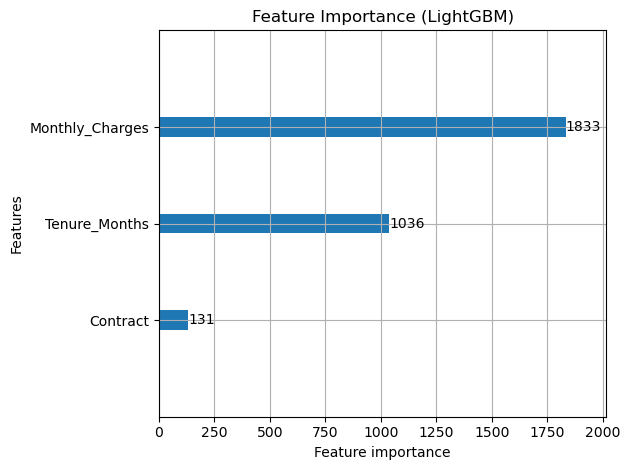

In [8]:
# Selected features with no multicollinearity
selected_features = ['Contract','Tenure Months', 'Monthly Charges']
target = 'Churn Value'

# Prepare features
X = df[selected_features].copy()
y = df[target]

categorical_cols = ['Contract']
X[categorical_cols] = X[categorical_cols].astype('category')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Handle class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# LightGBM datasets (no categorical features here)
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

# LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42,
    'scale_pos_weight': scale_pos_weight
}

# Train the model
model = lgb.train(params, lgb_train, num_boost_round=100)

# Predict
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

# Plot feature importance
lgb.plot_importance(model)
plt.title("Feature Importance (LightGBM)")
plt.tight_layout()
plt.show()

In [9]:
# Selected features based on correlation + no multicollinearity
selected_features = [
    'Contract', 'Tenure Months', 'Monthly Charges',
    'Dependents', 'Partner', 'Senior Citizen',
    'Online Security', 'Tech Support', 'Paperless Billing', 'Internet Service', 'Payment Method'
]
target = 'Churn Value'

# Prepare features and convert necessary columns to category
X = df[selected_features].copy()
y = df[target]

categorical_cols = ['Contract','Payment Method','Internet Service']
X[categorical_cols] = X[categorical_cols].astype('category')

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Handle class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Prepare LightGBM datasets
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

# LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42,
    'scale_pos_weight': scale_pos_weight
}

# Train the model
model = lgb.train(params, lgb_train, num_boost_round=100)

# Probability of churn
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))


Confusion Matrix:
 [[784 251]
 [ 87 287]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1035
           1       0.53      0.77      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



In [10]:
# --- Create results DataFrame with reset indexes to prevent misalignment ---
results_df = X_test.reset_index(drop=True).copy()
results_df['Actual Churn'] = y_test.reset_index(drop=True)
results_df['Churn Probability'] = y_pred
results_df['Predicted Churn'] = y_pred_binary

# --- Add churn risk tiers ---
# Manual-based binning method. 
# High Risk churh prob>=0.75
# Medium Risk 0.5=< churn prob < 0.75
# Low Risk churn prob < 0.5
def risk_label(p):
    if p >= 0.75:
        return 'High'
    elif p >= 0.5:
        return 'Medium'
    else:
        return 'Low'

results_df['Churn Risk'] = results_df['Churn Probability'].apply(risk_label)

# --- Export to Excel ---
output_path = r'C:\Users\didit\OneDrive\Desktop\Studio 6\Dataset\Churn_Predictions_LightGBMHyperv3.xlsx'

try:
    results_df.to_excel(output_path, index=False)
    print(f"✅ Predictions exported successfully to:\n{output_path}")
except Exception as e:
    print(f"❌ Error exporting file: {e}")

✅ Predictions exported successfully to:
C:\Users\didit\OneDrive\Desktop\Studio 6\Dataset\Churn_Predictions_LightGBMHyperv3.xlsx


              Feature    Importance  Importance_Pct
0            Contract  11607.665250       35.659003
1     Monthly_Charges   6868.041130       21.098774
2       Tenure_Months   5867.852511       18.026172
3          Dependents   3123.444810        9.595291
4    Internet_Service   1881.628838        5.780405
5      Payment_Method    755.121867        2.319751
6             Partner    667.209104        2.049681
7   Paperless_Billing    553.823798        1.701359
8     Online_Security    477.306913        1.466297
9        Tech_Support    416.657710        1.279982
10     Senior_Citizen    333.097920        1.023284


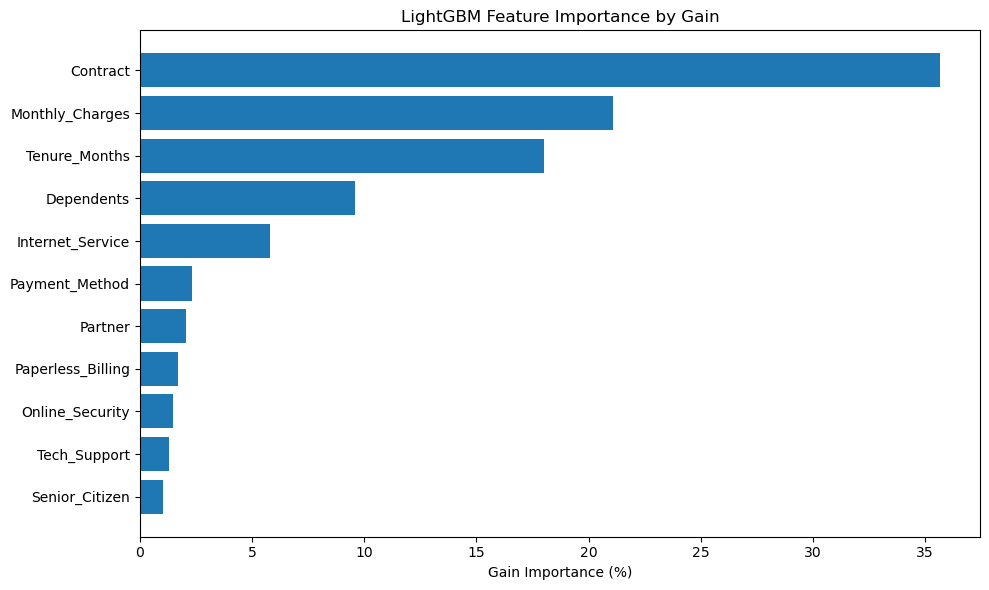

In [11]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance by gain
importance = model.feature_importance(importance_type='gain')
feature_names = model.feature_name()

# Create DataFrame with percentage
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Convert to percentage
importance_df['Importance_Pct'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()

# Sort and display
importance_df = importance_df.sort_values(by='Importance_Pct', ascending=False).reset_index(drop=True)
print(importance_df)

# Optional: Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance_Pct'])
plt.xlabel('Gain Importance (%)')
plt.title('LightGBM Feature Importance by Gain')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [12]:
# --- Create results DataFrame with reset indexes to prevent misalignment ---
results_df = X_test.reset_index(drop=True).copy()
results_df['Actual Churn'] = y_test.reset_index(drop=True)
results_df['Churn Probability'] = y_pred
results_df['Predicted Churn'] = y_pred_binary

# --- Add churn risk tiers ---
# Manual-based binning method. 
# High Risk churh prob>=0.66
# Medium Risk 0.33=< churn prob < 0.66
# Low Risk churn prob < 0.33
def risk_label(p):
    if p >= 0.66:
        return 'High'
    elif p >= 0.33:
        return 'Medium'
    else:
        return 'Low'

results_df['Churn Risk'] = results_df['Churn Probability'].apply(risk_label)

# --- Export to Excel ---
output_path = r'C:\Users\didit\OneDrive\Desktop\Studio 6\Dataset\Churn_Predictions_LightGBMHyperv4.xlsx'

try:
    results_df.to_excel(output_path, index=False)
    print(f"✅ Predictions exported successfully to:\n{output_path}")
except Exception as e:
    print(f"❌ Error exporting file: {e}")

✅ Predictions exported successfully to:
C:\Users\didit\OneDrive\Desktop\Studio 6\Dataset\Churn_Predictions_LightGBMHyperv4.xlsx


In [15]:
# Apply Churn Risk to entire dataset
# --- 1. Define the features you used during training
selected_features = [
    'Contract', 'Tenure Months', 'Monthly Charges',
    'Dependents', 'Partner', 'Senior Citizen',
    'Online Security', 'Tech Support', 'Paperless Billing', 'Internet Service', 'Payment Method'
]

# --- 2. Creates a new DataFrame with only the selected features, leaves original df unchanged
X_all = df[selected_features].copy()

# Ensure categorical columns are correctly set if used during training
categorical_cols = ['Contract','Payment Method', 'Internet Service']
for col in categorical_cols:
    X_all[col] = X_all[col].astype('category')

# --- 3. Get churn probability predictions for entire dataset
# Booster.predict() returns probabilities directly. Applies trained LightGBM Booster model to entire dataset
df['Churn Probability'] = model.predict(X_all) # model. picks up the trained model build on lgb.train(...)

# --- 4. Apply manual threshold-based binning to label churn risk
bins = [0, 0.33, 0.66, 1.0]  # you can adjust thresholds as needed
labels = ['Low', 'Medium', 'High']

df['Churn Risk Level'] = pd.cut(
    df['Churn Probability'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

# --- 5. Optional: See how many customers fall into each risk level
print(df['Churn Risk Level'].value_counts())

Churn Risk Level
Low       3654
High      1981
Medium    1408
Name: count, dtype: int64


In [23]:
# Export to Excel or CSV
# Include all selected features + Customer ID + churn outputs
columns_to_export = ['CustomerID','City','Gender'] + selected_features + ['CLTV', 'Churn Value', 'Churn Reason', 'Churn Probability', 'Churn Risk Level']

# Export to Excel
df[columns_to_export].to_excel(r'C:\Users\didit\OneDrive\Desktop\Studio 6\Dataset\EntireDataset_churn_risk_scores.xlsx', index=False)


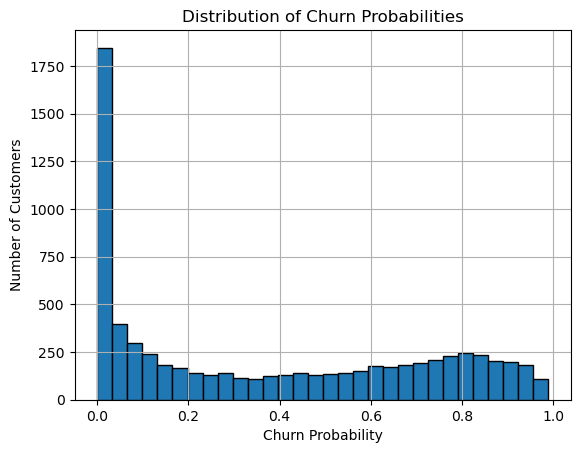

In [25]:
plt.hist(df['Churn Probability'], bins=30, edgecolor='black')
plt.title('Distribution of Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

C:\Users\didit\AppData\Local\Temp\ipykernel_19692\2967397054.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Churn Risk Level')['Churn Value'].mean().plot(kind='bar', color='skyblue')


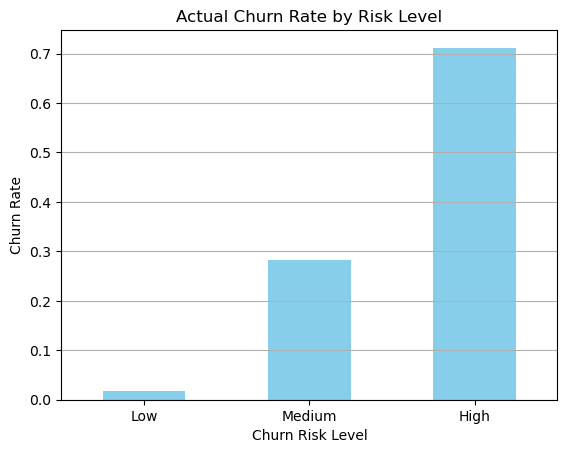

In [27]:
# Churn Rate by Risk Level
df.groupby('Churn Risk Level')['Churn Value'].mean().plot(kind='bar', color='skyblue')
plt.title('Actual Churn Rate by Risk Level')
plt.ylabel('Churn Rate')
plt.xlabel('Churn Risk Level')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()